In [1]:
import os
import imghdr
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_io as tfio
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
root_dir = 'data/'
dataset_name = 'bird audios'

# LOAD AUDIOS and ANALYZE

In [9]:
class AudioDataLoader(object):
    def __init__(
                self,
                root_dir,
                dataset_name,
                sample_rate = 16000,
                ):
        self.root_dir = root_dir
        self.sample_rate = sample_rate
        self.dataset_name = dataset_name

    def load_wav_16k_mono(self, filename):
        file_contents = tf.io.read_file(filename)
        wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) # Only Process MONO Audio
        wav = tf.squeeze(wav, axis=-1)
        sample_rate = tf.cast(sample_rate, dtype=tf.int64)
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=self.sample_rate)
        return wav

    def plot_audios(self, audio_list, labels=None):
        plt.figure(figsize=(20, 10))
        for i, audio in enumerate(audio_list):
            plt.subplot(1, len(audio_list), i+1)
            plt.plot(audio.numpy())
        plt.show()

In [10]:
class_names = ['Capuchinbird', 'Not_Capuchinbird']
positive_audio_file = os.path.join(root_dir, dataset_name, class_names[0], 'XC3776-0.wav')
negative_audio_file = os.path.join(root_dir, dataset_name, class_names[1], 'afternoon-birds-song-in-forest-0.wav')

In [11]:
audio_obj = AudioDataLoader(root_dir, dataset_name)
positive_audio = audio_obj.load_wav_16k_mono(positive_audio_file)
negative_audio = audio_obj.load_wav_16k_mono(negative_audio_file)

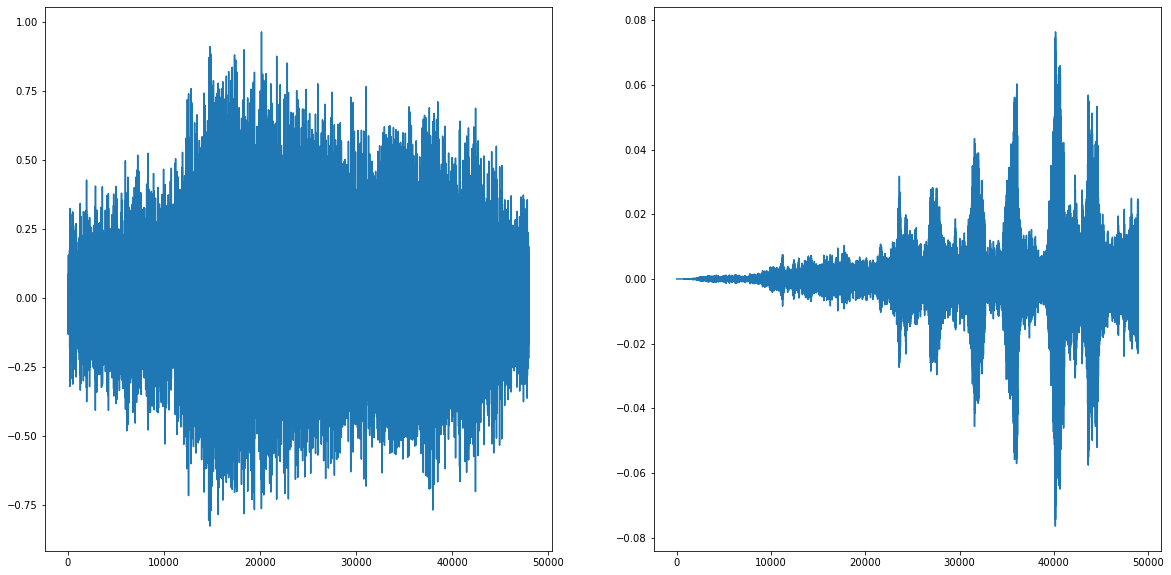

In [12]:
# plot audios
audio_obj.plot_audios([positive_audio, negative_audio], labels=class_names)